<a href="https://colab.research.google.com/github/ShaheryarKhan7/Titanic-Data-set-using-Machine-Learning-Algorithms/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import utils
from sklearn import tree
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn import utils
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/datasets/train.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# as Age, Cabin and Embarked columns have missing values so by using fillna function we are filling the missing values
df_train['Age'].fillna(df_train['Age'].mode()[0], inplace=True)
df_train['Cabin'].fillna(df_train['Cabin'].mode()[0], inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Converting textual values of Sex,Cabin,Embarked columns into integer
x_sex=df_train['Sex']
lab_enc=preprocessing.LabelEncoder()
df_train['Sex'] = lab_enc.fit_transform(x_sex)
x_cabin=df_train['Cabin']
lab_enc=preprocessing.LabelEncoder()
df_train['Cabin'] = lab_enc.fit_transform(x_cabin)
x_embarked=df_train['Embarked']
lab_enc=preprocessing.LabelEncoder()
df_train['Embarked'] = lab_enc.fit_transform(x_embarked)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


In [ ]:
#Converting Age and Fare attributes from float to int
df_train['Age'] = df_train['Age'].astype(int)
df_train['Fare'] = df_train['Fare'].astype(int)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int64 
 10  Cabin        891 non-null    int64 
 11  Embarked     891 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 83.7+ KB


In [ ]:
#splitting dependent and independent varaibles
X=df_train.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
y=df_train['Survived']

In [ ]:
print(y.value_counts())
# Data is not balanced

0    549
1    342
Name: Survived, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


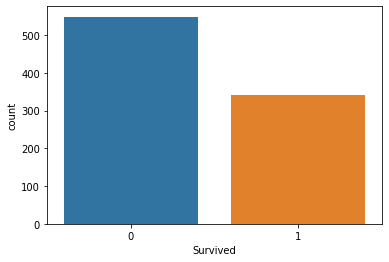

In [ ]:
sns.countplot(y)

In [ ]:
#inorder to balance data
over=SMOTE()
under=RandomUnderSampler()
steps=[('o',over),('u',under)]
pipeline=Pipeline(steps=steps)
X,y = pipeline.fit_resample(X,y)

In [ ]:
print(y.value_counts())

0    549
1    549
Name: Survived, dtype: int64


In [ ]:
#performing Standardization only for Logistic Regression, SVM and KNN so values will come in range
scaler = StandardScaler()
X =scaler.fit_transform(X)

In [ ]:
#splitting data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(768, 8) (330, 8) (768,) (330,)


In [ ]:
#Logistic Regression Algorithm
model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print(classification_report(y_test,prediction))
print("Accuracy of Logistic Regression model is  = {:,.2f}".format(accuracy_score(prediction,y_test)*100))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       176
           1       0.84      0.82      0.83       154

    accuracy                           0.85       330
   macro avg       0.85      0.84      0.84       330
weighted avg       0.85      0.85      0.85       330

Accuracy of Logistic Regression model is  = 84.55


In [ ]:
#Testing for a random row 
example=[[2,1,27,0,0,7,47,2]]
#making prediction based on x values
print("Outcome should be 0:",0 == model.predict(example)[0]) #outcome should be 0

Outcome should be 0: True


In [ ]:
#KNN Algorithm
array=[]
for i in range(1,21,2):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  prediction = model.predict(X_test)
  array.append(accuracy_score(prediction,y_test))
  print(f"when value of k is {i}")
  print("Testing accuracy {:.2f}".format(accuracy_score(prediction,y_test)*100))

when value of k is 1
Testing accuracy 82.42
when value of k is 3
Testing accuracy 85.45
when value of k is 5
Testing accuracy 85.76
when value of k is 7
Testing accuracy 85.15
when value of k is 9
Testing accuracy 85.15
when value of k is 11
Testing accuracy 85.15
when value of k is 13
Testing accuracy 84.24
when value of k is 15
Testing accuracy 84.85
when value of k is 17
Testing accuracy 83.64
when value of k is 19
Testing accuracy 83.94


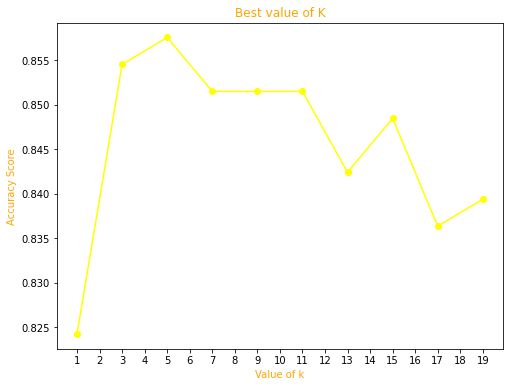

In [ ]:
#Graph for plotting which value of ki is best
plt.figure(figsize=(8,6))
plt.plot(range(1,21,2),array,marker="o",color="yellow")
plt.xlabel("Value of k",color="orange")
plt.ylabel("Accuracy Score",color="orange")
plt.title("Best value of K",color="orange")
plt.xticks(range(1,20))
plt.show()

In [ ]:
#Decision Tree Model 
for i in range(1,8):
  model=tree.DecisionTreeClassifier(max_depth=i,random_state=42,criterion='entropy')
  model.fit(X_train,y_train)
  prediction = model.predict(X_test)
  print("When max depth is ",i)
  print("Accuracy of Decision Tree Classifier on training set {: .2f}".format(model.score(X_train,y_train)*100))
  print("Accuracy of Decision Tree classifier on testing set  {: .2f}".format(accuracy_score(prediction,y_test)*100))

When max depth is  1
Accuracy of Decision Tree Classifier on training set  78.91
Accuracy of Decision Tree classifier on testing set   83.03
When max depth is  2
Accuracy of Decision Tree Classifier on training set  78.91
Accuracy of Decision Tree classifier on testing set   83.03
When max depth is  3
Accuracy of Decision Tree Classifier on training set  80.34
Accuracy of Decision Tree classifier on testing set   85.76
When max depth is  4
Accuracy of Decision Tree Classifier on training set  83.33
Accuracy of Decision Tree classifier on testing set   85.15
When max depth is  5
Accuracy of Decision Tree Classifier on training set  85.42
Accuracy of Decision Tree classifier on testing set   84.85
When max depth is  6
Accuracy of Decision Tree Classifier on training set  86.46
Accuracy of Decision Tree classifier on testing set   85.76
When max depth is  7
Accuracy of Decision Tree Classifier on training set  88.02
Accuracy of Decision Tree classifier on testing set   87.27


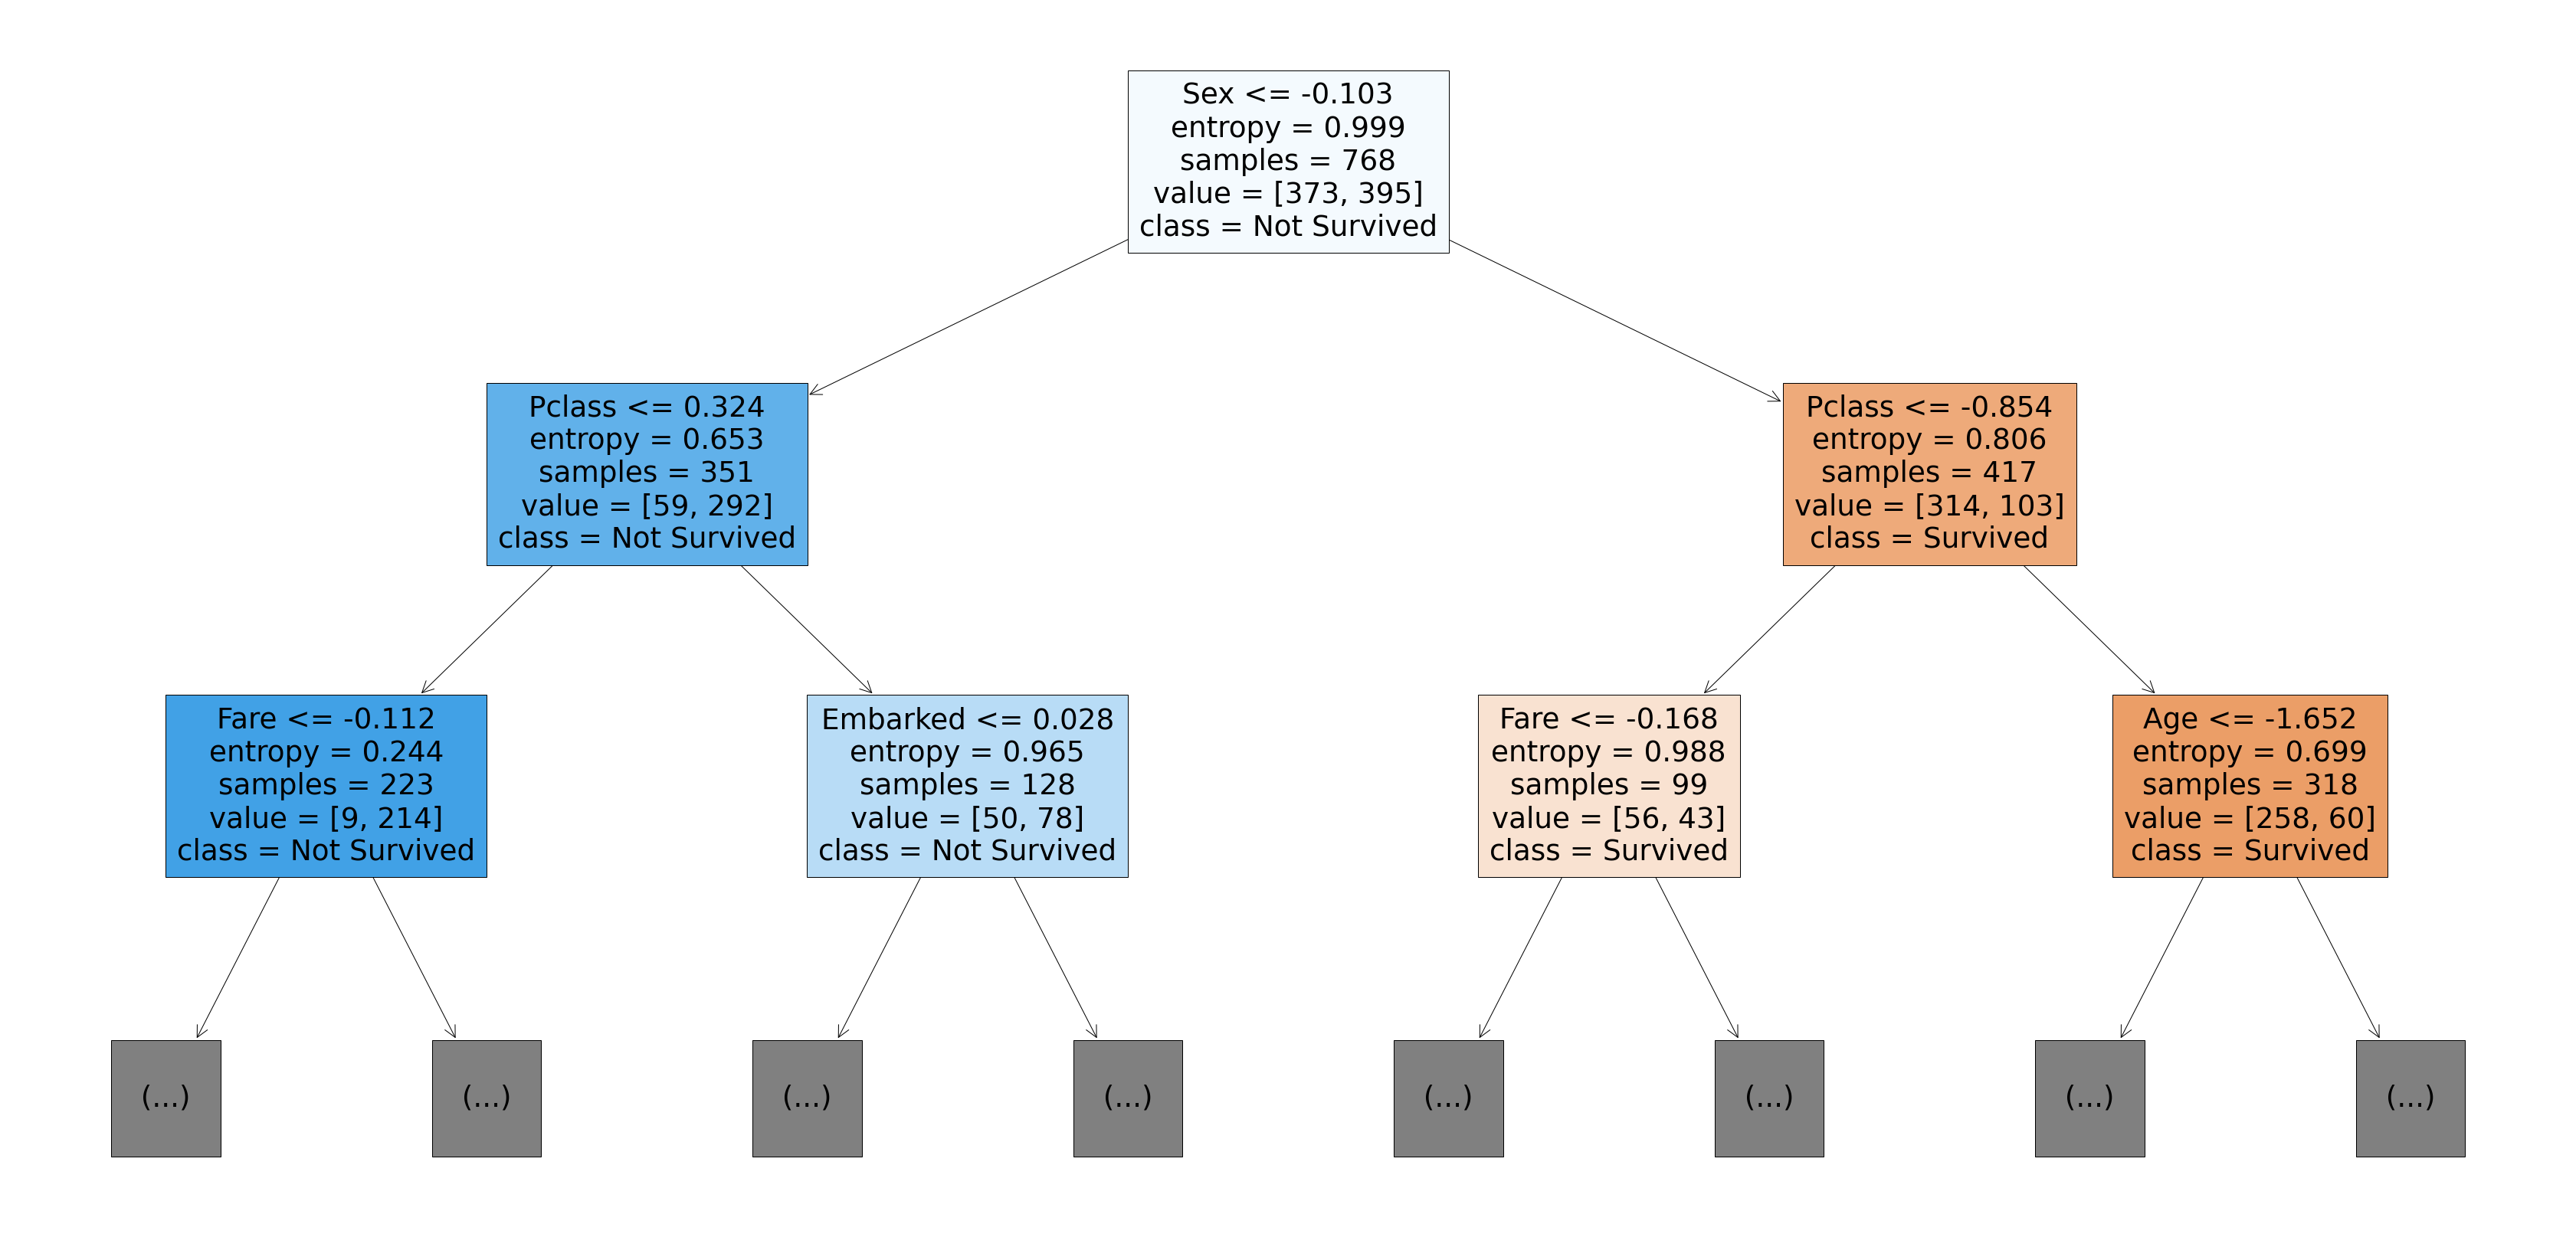

In [ ]:
#Plotting Decision Tree
plt.figure(figsize=(60,30))
tree.plot_tree(model,max_depth=2,feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked'],class_names=["Survived","Not Survived"],filled=True);

In [ ]:
#SVM Model 
svm_model=svm.SVC(kernel='rbf',random_state=42)
svm_model.fit(X_train,y_train)
predict = svm_model.predict(X_test)
print("Accuracy {:.2f}".format(accuracy_score(predict,y_test)*100))

Accuracy 86.67


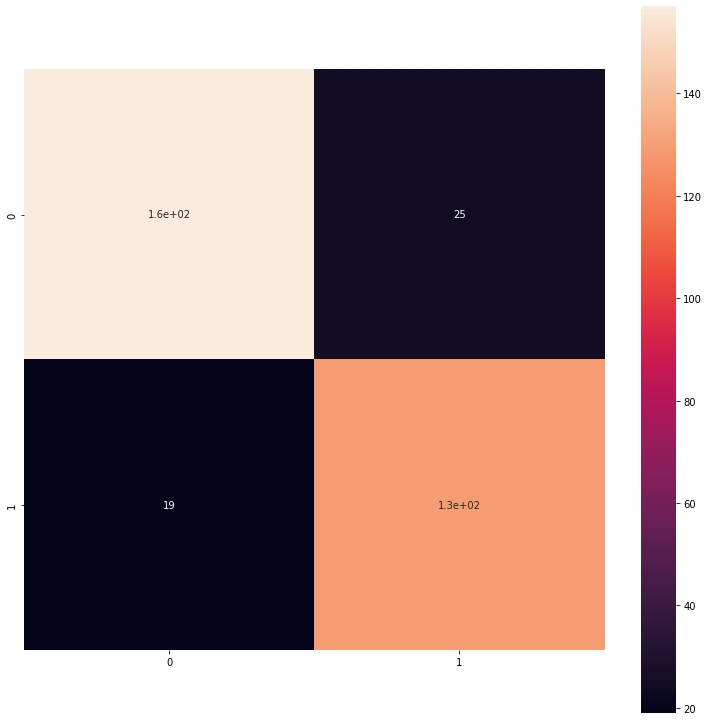

In [ ]:
from sklearn.metrics import confusion_matrix
#correlation of dataset
plt.figure(figsize=(13,13))
#sns.heatmap(df_train.corr(),annot=True,square=True)
sns.heatmap(confusion_matrix(predict,y_test),annot=True,square=True)

In [ ]:
#Random Forest Model 
parameters = [{
    'n_estimators': [100,400,700,1000],
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5],
    'max_features':['sqrt','log2']
}]
RF_model = RandomForestClassifier(random_state=42)
RF_grid = GridSearchCV(estimator=RF_model,param_grid=parameters,scoring='accuracy',n_jobs=-1,cv=10)
RF_grid.fit(X_train,y_train)
df = pd.DataFrame(RF_grid.cv_results_)
df[['param_max_depth','param_n_estimators','param_criterion','mean_test_score']]

,param_max_depth,param_n_estimators,param_criterion,mean_test_score
0,3,100,gini,0.803281
1,3,400,gini,0.809792
2,3,700,gini,0.808493
3,3,1000,gini,0.804597
4,3,100,gini,0.798086
5,3,400,gini,0.805930
6,3,700,gini,0.801982
7,3,1000,gini,0.805913
8,4,100,gini,0.817601
9,4,400,gini,0.816319


In [ ]:
print("Best parameters for Random Forest",RF_grid.best_params_)
print("Random Forest Accuracy {:.2f}".format(RF_grid.best_score_*100))

Best parameters for Random Forest {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 1000}
Random Forest Accuracy 82.94


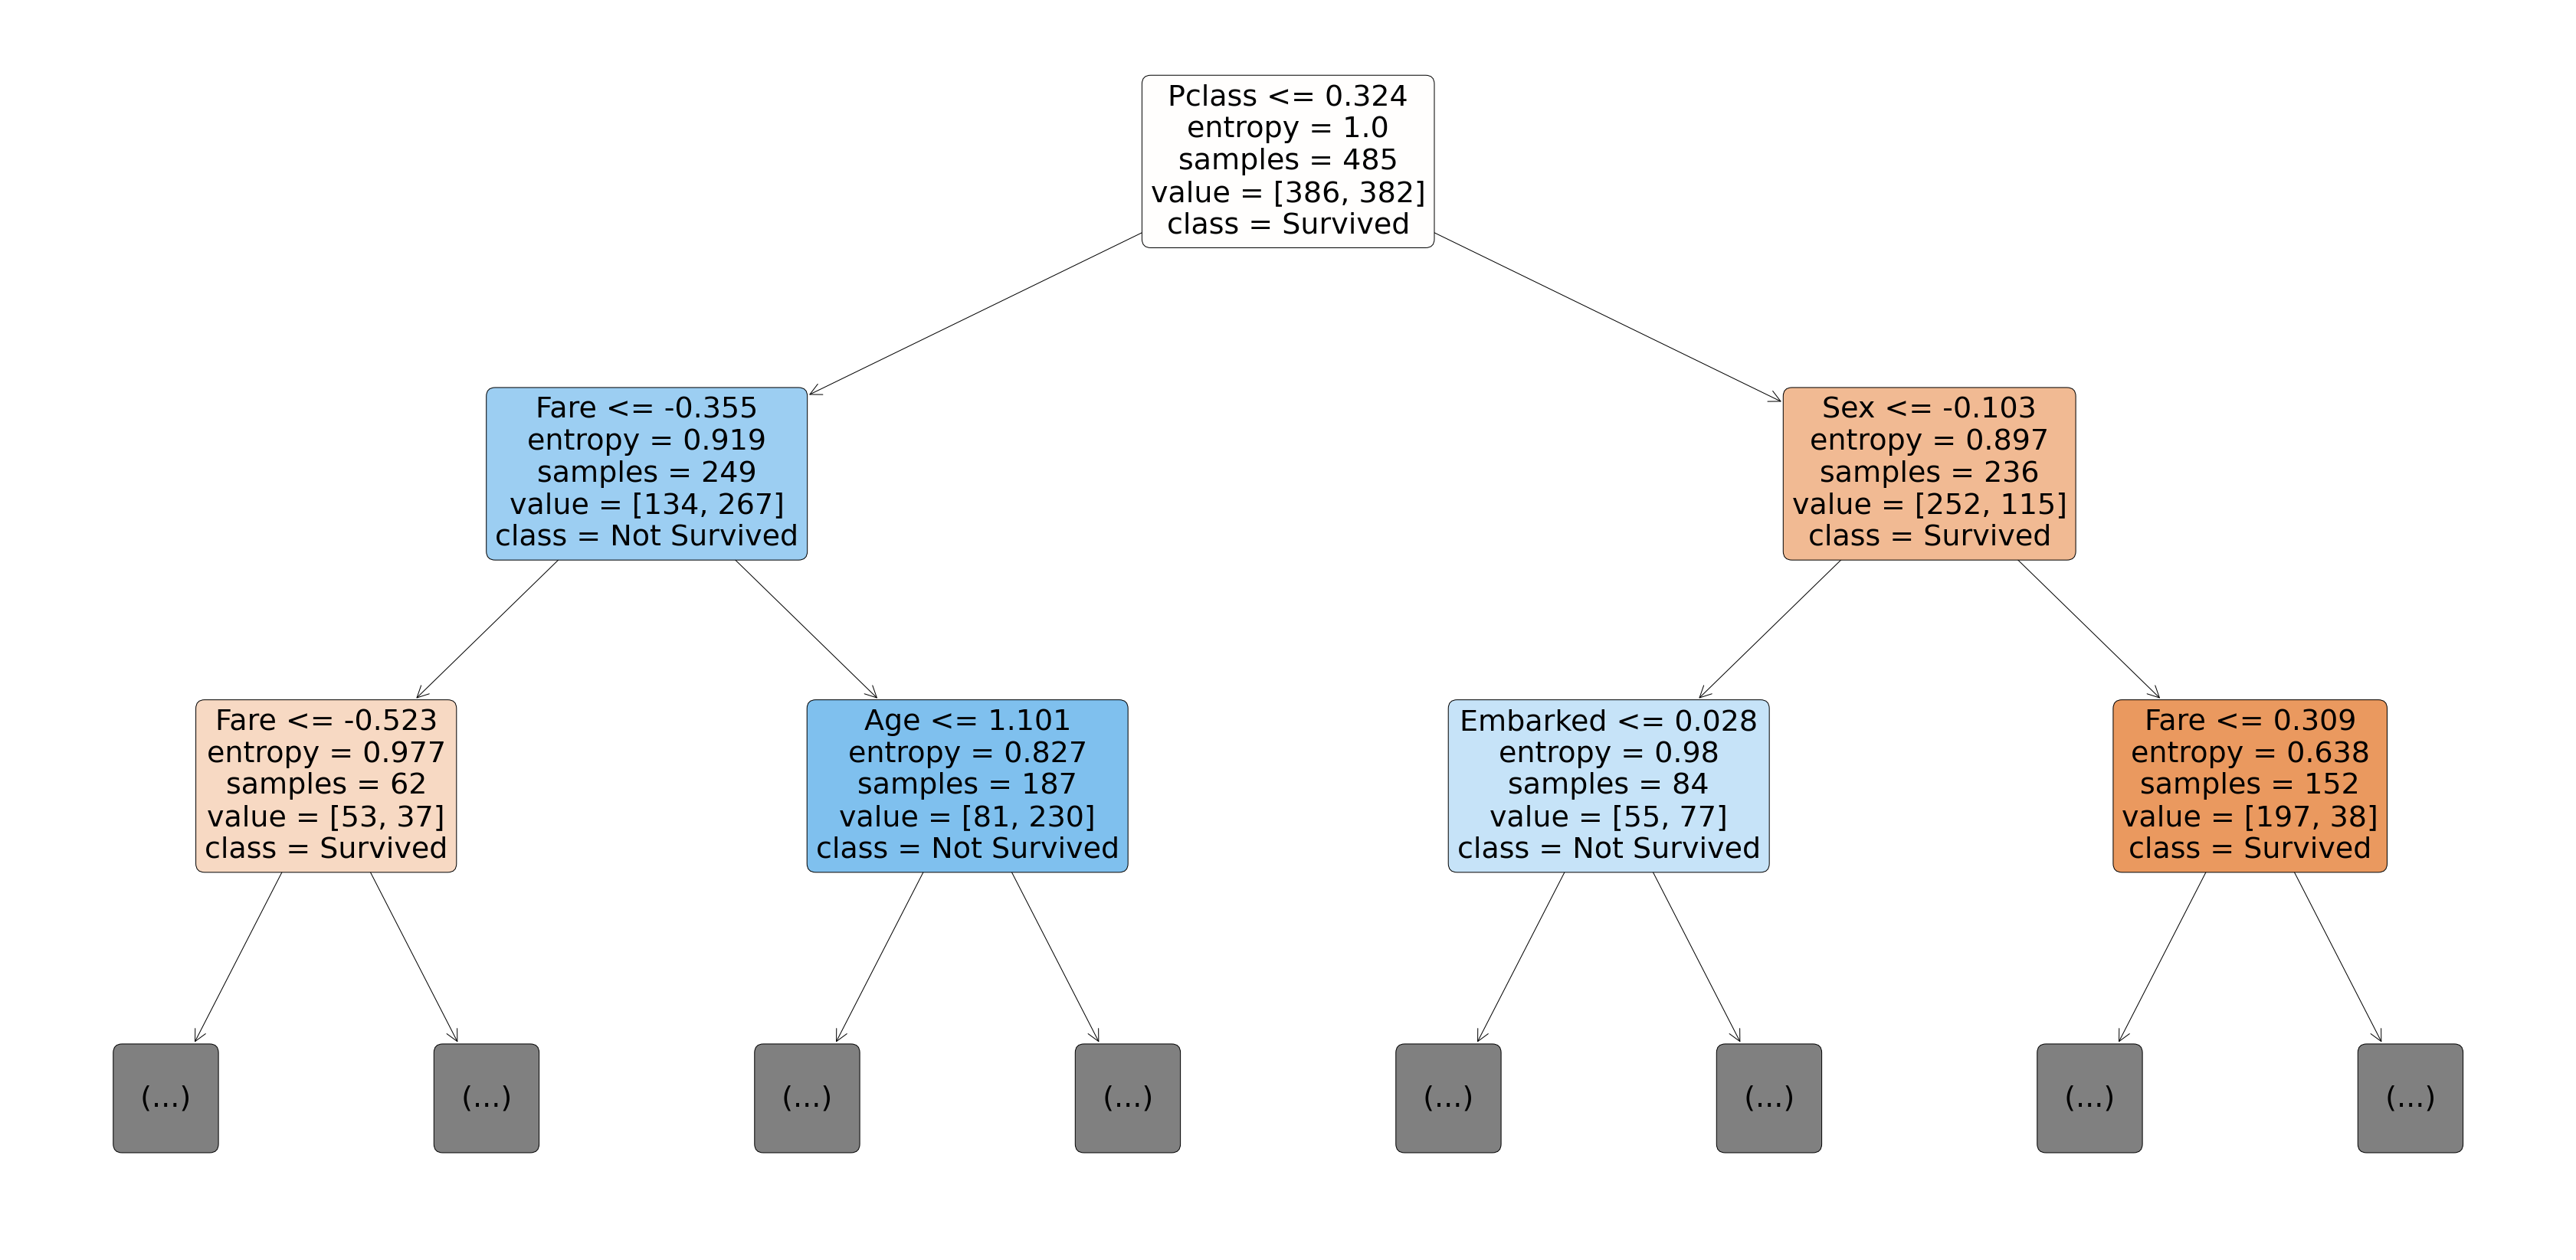

In [ ]:
#Plotting Random Forest
plt.figure(figsize=(60,30))
tree.plot_tree(RF_grid.best_estimator_[7],max_depth=2,feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked'],class_names=["Survived","Not Survived"],rounded=True,filled=True,impurity=True);

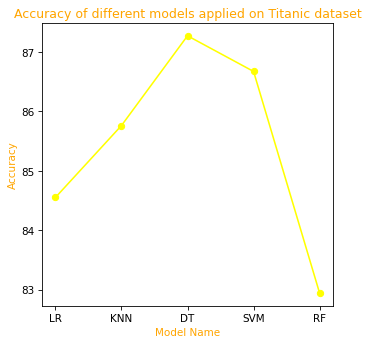

In [ ]:
LR_accuracy= 84.55
KNN_accuracy = 85.76  #for k=5
TREE_accuracy = 87.27 #for maxdepth=7
SVM_accuracy = 86.67
RF_accuracy =82.94
plt.figure(figsize=(5,5),dpi=75)
plt.plot(range(1,6),[LR_accuracy,KNN_accuracy,TREE_accuracy,SVM_accuracy,RF_accuracy],marker="o",color="yellow")
plt.xticks(range(1,6),['LR','KNN','DT','SVM','RF'])
plt.title("Accuracy of different models applied on Titanic dataset",color="orange")
plt.xlabel("Model Name",color="orange")
plt.ylabel("Accuracy",color="orange")
plt.show()